# 本节课主要针对一维数据的读取、切片、分析

In [1]:
import pandas as pd

# 读取数据
对数据进行总体查看

In [2]:
# 读取数据
# df_zb_data是总的数据集
# df_zb_meta是元数据，在这里指的是“指标”
# 元数据是关于数据的数据
# df_level2是地区

df_zb_data = pd.read_csv("fsnd_zb_data.tsv",encoding="utf8",sep="\t", \
                        keep_default_na=False,na_values="na_rep",index_col=[0,1,2])  # 用0，1，2行做索引
df_zb_meta = pd.read_csv("fsnd_zb_meta.tsv",encoding="utf8",sep="\t",keep_default_na=False,na_values="na_rep",index_col=[0])
df_reg_level2 = pd.read_csv("reg_treeId_level2.tsv",encoding="utf8",sep="\t",keep_default_na=False,na_values="na_rep")

# keep_default_na参数用来控制是否要将被判定的缺失值转换为NaN这一过程，默认为True
# 当keep_default_na=False时，源文件中出现的什么值，DataFrame中就是什么值
# na_values用来控制那些值会被判定为缺失值，它接收一个列表或者集合，当列表或者几个中出现的字符串在文件中出现时，它也会被判定为缺失值

In [3]:
# 查看第一个数据
display(df_zb_data)

data
zb      reg    sj             
A010101 110000 2018        NaN
               2017        NaN
               2016        NaN
               2015        NaN
               2014        NaN
...                        ...
A0S0B05 650000 2013  33.856600
               2012  24.914044
               2011        NaN
               2010        NaN
               2009        NaN

[908300 rows x 1 columns]

In [4]:
# 查看数据的行、列统计信息
df_zb_data.shape

(908300, 1)

In [5]:
# 查看第二个数据（指标）
df_zb_meta

,cname,dotcount,exp,ifshowcode,memo,name,nodesort,sortcode,tag,unit
code,,,,,,,,,,
A010101,地级区划数,0,指地级行政单位即介于省级和县级之间的一级地方行政区域的个数，包括地区、自治州、行政区和盟。,False,,地级区划数,1,2,,个
A010102,地级市数,0,市是省、自治区内人口较集中，政治、经济、文化等方面较重要的城市。市人民政府为一级地方行政组织...,False,,地级市数,1,3,,个
A010103,县级区划数,0,县级行政单位指中国地方二级行政区域，是地方政权的基础。县级行政单位包括县、自治县、旗、自治旗...,False,,县级区划数,1,4,,个
A010104,市辖区数,0,市辖区（简称区）城市基层政权组织的行政区域。直辖市和较大的市多将市区范围划分为若干区，设立区...,False,,市辖区数,1,5,,个
A010105,县级市数,0,县级市是中国大陆行政区划名称，行政地位与县相同的县级行政区,False,,县级市数,1,6,,个
...,...,...,...,...,...,...,...,...,...,...
A0S0B01,城乡居民社会养老保险参保人数,1,,False,,城乡居民社会养老保险参保人数,1,3355,,万人
A0S0B02,城乡居民社会养老保险实际领取待遇人数,1,,False,,城乡居民社会养老保险实际领取待遇人数,1,3356,,万人
A0S0B03,城乡居民社会养老保险基金收入,1,,False,,城乡居民社会养老保险基金收入,1,3357,,亿元


In [6]:
# 创建指标字典
指标字典 = df_zb_meta['cname'].to_dict()
指标字典

{'A010101': '地级区划数',
 'A010102': '地级市数',
 'A010103': '县级区划数',
 'A010104': '市辖区数',
 'A010105': '县级市数',
 'A010106': '县数',
 'A010107': '自治县数',
 'A010108': '乡镇级区划数',
 'A010109': '镇数',
 'A01010A': '乡数',
 'A01010B': '街道办事处',
 'A010201': '三次产业法人单位数',
 'A010202': '分机构类型法人单位数',
 'A010203': '分行业法人单位数',
 'A010301': '按控股情况分企业法人单位数',
 'A010302': '按登记注册类型分企业法人单位数',
 'A020101': '地区生产总值',
 'A020102': '第一产业增加值',
 'A020103': '第二产业增加值',
 'A020104': '第三产业增加值',
 'A020105': '农林牧渔业增加值',
 'A020106': '工业增加值',
 'A020107': '建筑业增加值',
 'A020108': '批发和零售业增加值',
 'A020109': '批发和零售贸易餐饮业增加值',
 'A02010A': '交通运输、仓储和邮政业增加值',
 'A02010B': '交通运输、仓储和邮电通信业增加值',
 'A02010C': '住宿和餐饮业增加值',
 'A02010D': '金融业增加值',
 'A02010E': '房地产业增加值',
 'A02010F': '其他行业增加值',
 'A02010G': '人均地区生产总值',
 'A020201': '地区生产总值指数(上年=100)',
 'A020202': '第一产业增加值指数(上年=100)',
 'A020203': '第二产业增加值指数(上年=100)',
 'A020204': '第三产业增加值指数(上年=100)',
 'A020301': '收入法生产总值',
 'A020302': '劳动者报酬',
 'A020303': '生产税净额',
 'A020304': '固定资产折旧',
 'A020305': '营业盈余',
 'A020401': '支出法生

In [7]:
# 查看第三个数据（地区）
df_reg_level2

,i,dbcode,exp,id,isParent,name,open,pid,wd
0,0,fsnd,,110000,True,北京市,False,100001,reg
1,1,fsnd,,120000,True,天津市,False,100001,reg
2,2,fsnd,,130000,True,河北省,False,100001,reg
3,3,fsnd,,140000,True,山西省,False,100001,reg
4,4,fsnd,,150000,True,内蒙古自治区,False,100001,reg
...,...,...,...,...,...,...,...,...,...
128,7,fsnd,,610000,True,陕西省,False,900003,reg
129,8,fsnd,,620000,True,甘肃省,False,900003,reg
130,9,fsnd,,630000,True,青海省,False,900003,reg
131,10,fsnd,,640000,True,宁夏回族自治区,False,900003,reg


In [8]:
# 创建地区字典
地区字典 = df_reg_level2.set_index("id")['name'].to_dict()
地区字典

{110000: '北京市',
 120000: '天津市',
 130000: '河北省',
 140000: '山西省',
 150000: '内蒙古自治区',
 210000: '辽宁省',
 220000: '吉林省',
 230000: '黑龙江省',
 310000: '上海市',
 320000: '江苏省',
 330000: '浙江省',
 340000: '安徽省',
 350000: '福建省',
 360000: '江西省',
 370000: '山东省',
 410000: '河南省',
 420000: '湖北省',
 430000: '湖南省',
 440000: '广东省',
 450000: '广西壮族自治区',
 460000: '海南省',
 500000: '重庆市',
 510000: '四川省',
 520000: '贵州省',
 530000: '云南省',
 540000: '西藏自治区',
 610000: '陕西省',
 620000: '甘肃省',
 630000: '青海省',
 640000: '宁夏回族自治区',
 650000: '新疆维吾尔自治区'}

In [9]:
# 使用字典进行数据框转换
# 用指标字典替换zb列的数据
df = df_zb_data.reset_index().set_index("zb").rename(index=指标字典)
df

,reg,sj,data
zb,,,
地级区划数,110000,2018,NaN
地级区划数,110000,2017,NaN
地级区划数,110000,2016,NaN
地级区划数,110000,2015,NaN
地级区划数,110000,2014,NaN
...,...,...,...
城乡居民社会养老保险累计结余,650000,2013,33.856600
城乡居民社会养老保险累计结余,650000,2012,24.914044
城乡居民社会养老保险累计结余,650000,2011,NaN


In [10]:
# 用地区字典替换reg列的数据
df = df.reset_index().set_index("reg").rename(index=地区字典)
df

,zb,sj,data
reg,,,
北京市,地级区划数,2018,NaN
北京市,地级区划数,2017,NaN
北京市,地级区划数,2016,NaN
北京市,地级区划数,2015,NaN
北京市,地级区划数,2014,NaN
...,...,...,...
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2013,33.856600
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2012,24.914044
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2011,NaN


In [11]:
# 对行索引进行重命名
df_new = df.reset_index().rename(columns={"reg":"地区","zb":"指标","sj":"年","data":"数据"})
df_new

,地区,指标,年,数据
0,北京市,地级区划数,2018,NaN
1,北京市,地级区划数,2017,NaN
2,北京市,地级区划数,2016,NaN
3,北京市,地级区划数,2015,NaN
4,北京市,地级区划数,2014,NaN
...,...,...,...,...
908295,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2013,33.856600
908296,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2012,24.914044
908297,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2011,NaN
908298,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2010,NaN


# 数据切片：快速查找数据
要有问题意识地去进行切片

In [12]:
# 切片：筛选指标为“城镇单位就业人员”的数据
data = df_new[df_new.指标.str.contains("城镇单位就业人员")]
data

,地区,指标,年,数据
19530,北京市,城镇单位就业人员,2018,NaN
19531,北京市,城镇单位就业人员,2017,812.8589
19532,北京市,城镇单位就业人员,2016,791.5197
19533,北京市,城镇单位就业人员,2015,777.3448
19534,北京市,城镇单位就业人员,2014,755.8601
...,...,...,...,...
56725,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2013,46636.0000
56726,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2012,45071.0000
56727,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2011,39862.0000
56728,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2010,35950.0000


In [13]:
# 另一种数据切片的方法
df_new.set_index("指标").loc["城镇单位就业人员工资总额","年":"数据"]

,年,数据
指标,,
城镇单位就业人员工资总额,2018,NaN
城镇单位就业人员工资总额,2017,10675.97363
城镇单位就业人员工资总额,2016,9463.26084
城镇单位就业人员工资总额,2015,8643.54357
城镇单位就业人员工资总额,2014,7687.60206
...,...,...
城镇单位就业人员工资总额,2013,1674.73486
城镇单位就业人员工资总额,2012,1388.13884
城镇单位就业人员工资总额,2011,1124.58182


In [14]:
# 查看指标的分类
# unique()：返回参数数组中所有不同的值，并按照从小到大排序
指标分的可能性 = data.指标.unique()
指标分的可能性

array(['城镇单位就业人员', '农林牧渔业城镇单位就业人员', '采矿业城镇单位就业人员', '制造业城镇单位就业人员',
       '电力、燃气及水的生产和供应业城镇单位就业人员', '建筑业城镇单位就业人员', '交通运输、仓储及邮电通信业城镇单位就业人员',
       '信息传输、计算机服务和软件业城镇单位就业人员', '批发和零售业城镇单位就业人员', '住宿和餐饮业城镇单位就业人员',
       '金融业城镇单位就业人员', '房地产业城镇单位就业人员', '租赁和商务服务业城镇单位就业人员',
       '科学研究、技术服务和地质勘查业城镇单位就业人员', '水利、环境和公共设施管理业城镇单位就业人员',
       '居民服务和其他服务业城镇单位就业人员', '教育业城镇单位就业人员', '卫生、社会保障和社会福利业城镇单位就业人员',
       '文化、体育和娱乐业城镇单位就业人员', '公共管理和社会组织城镇单位就业人员', '城镇单位就业人员工资总额',
       '国有城镇单位就业人员工资总额', '其他城镇单位就业人员工资总额', '城镇单位就业人员工资总额指数(上年=100)',
       '国有城镇单位就业人员工资总额指数(上年=100)', '其他城镇单位就业人员工资总额指数(上年=100)',
       '城镇单位就业人员平均工资', '城镇单位就业人员平均货币工资指数(上年=100)',
       '国有城镇单位就业人员平均货币工资指数(上年=100)', '其他城镇单位就业人员平均货币工资指数(上年=100)',
       '城镇单位就业人员平均实际工资指数(上年=100)', '国有城镇单位就业人员平均实际工资指数(上年=100)',
       '其他城镇单位就业人员平均实际工资指数(上年=100)', '农、林、牧、渔业城镇单位就业人员工资总额',
       '采矿业城镇单位就业人员工资总额', '制造业城镇单位就业人员工资总额', '电力、燃气及水的生产和供应业城镇单位就业人员工资总额',
       '建筑业城镇单位就业人员工资总额', '交通运输、仓储和邮政业城镇单位就业人员工资总额',
       '信息传输、计算机服务和软件业城镇单位就业人员工资总额', 

In [15]:
# 拆分带有“城镇单位就业”的词
指标分的可能性 = [x.split("城镇单位就业") for x in data.指标.unique()]
指标分的可能性

[['', '人员'],
 ['农林牧渔业', '人员'],
 ['采矿业', '人员'],
 ['制造业', '人员'],
 ['电力、燃气及水的生产和供应业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储及邮电通信业', '人员'],
 ['信息传输、计算机服务和软件业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['金融业', '人员'],
 ['房地产业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['科学研究、技术服务和地质勘查业', '人员'],
 ['水利、环境和公共设施管理业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['教育业', '人员'],
 ['卫生、社会保障和社会福利业', '人员'],
 ['文化、体育和娱乐业', '人员'],
 ['公共管理和社会组织', '人员'],
 ['', '人员工资总额'],
 ['国有', '人员工资总额'],
 ['其他', '人员工资总额'],
 ['', '人员工资总额指数(上年=100)'],
 ['国有', '人员工资总额指数(上年=100)'],
 ['其他', '人员工资总额指数(上年=100)'],
 ['', '人员平均工资'],
 ['', '人员平均货币工资指数(上年=100)'],
 ['国有', '人员平均货币工资指数(上年=100)'],
 ['其他', '人员平均货币工资指数(上年=100)'],
 ['', '人员平均实际工资指数(上年=100)'],
 ['国有', '人员平均实际工资指数(上年=100)'],
 ['其他', '人员平均实际工资指数(上年=100)'],
 ['农、林、牧、渔业', '人员工资总额'],
 ['采矿业', '人员工资总额'],
 ['制造业', '人员工资总额'],
 ['电力、燃气及水的生产和供应业', '人员工资总额'],
 ['建筑业', '人员工资总额'],
 ['交通运输、仓储和邮政业', '人员工资总额'],
 ['信息传输、计算机服务和软件业', '人员工资总额'],
 ['批发和零售业', '人员工资总额'],
 ['住宿和餐饮业', '人员工资总额'],
 ['金融业', '人员工资总额'],
 ['房地产

In [16]:
# 只取 “人员” “人员平均工资”
指标分的可能性_取 = [[x,y] for (x,y) in 指标分的可能性 if (y=='人员平均工资' or y=='人员') and x != '']
指标分的可能性_取

[['农林牧渔业', '人员'],
 ['采矿业', '人员'],
 ['制造业', '人员'],
 ['电力、燃气及水的生产和供应业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储及邮电通信业', '人员'],
 ['信息传输、计算机服务和软件业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['金融业', '人员'],
 ['房地产业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['科学研究、技术服务和地质勘查业', '人员'],
 ['水利、环境和公共设施管理业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['教育业', '人员'],
 ['卫生、社会保障和社会福利业', '人员'],
 ['文化、体育和娱乐业', '人员'],
 ['公共管理和社会组织', '人员'],
 ['农、林、牧、渔业', '人员平均工资'],
 ['采矿业', '人员平均工资'],
 ['制造业', '人员平均工资'],
 ['电力、燃气及水的生产和供应业', '人员平均工资'],
 ['建筑业', '人员平均工资'],
 ['交通运输、仓储和邮政业', '人员平均工资'],
 ['信息传输、计算机服务和软件业', '人员平均工资'],
 ['批发和零售业', '人员平均工资'],
 ['住宿和餐饮业', '人员平均工资'],
 ['金融业', '人员平均工资'],
 ['房地产业', '人员平均工资'],
 ['租赁和商务服务业', '人员平均工资'],
 ['科学研究、技术服务和地质勘查业', '人员平均工资'],
 ['水利、环境和公共设施管理业', '人员平均工资'],
 ['居民服务和其他服务业', '人员平均工资'],
 ['教育', '人员平均工资'],
 ['卫生、社会保障和社会福利业', '人员平均工资'],
 ['文化、体育和娱乐业', '人员平均工资'],
 ['公共管理和社会组织', '人员平均工资']]

In [17]:
# 将上面筛选出来的结果合并拼接
指标分的可能性_取_all = ["城镇单位就业".join(x) for x in 指标分的可能性_取]
指标分的可能性_取_all

['农林牧渔业城镇单位就业人员',
 '采矿业城镇单位就业人员',
 '制造业城镇单位就业人员',
 '电力、燃气及水的生产和供应业城镇单位就业人员',
 '建筑业城镇单位就业人员',
 '交通运输、仓储及邮电通信业城镇单位就业人员',
 '信息传输、计算机服务和软件业城镇单位就业人员',
 '批发和零售业城镇单位就业人员',
 '住宿和餐饮业城镇单位就业人员',
 '金融业城镇单位就业人员',
 '房地产业城镇单位就业人员',
 '租赁和商务服务业城镇单位就业人员',
 '科学研究、技术服务和地质勘查业城镇单位就业人员',
 '水利、环境和公共设施管理业城镇单位就业人员',
 '居民服务和其他服务业城镇单位就业人员',
 '教育业城镇单位就业人员',
 '卫生、社会保障和社会福利业城镇单位就业人员',
 '文化、体育和娱乐业城镇单位就业人员',
 '公共管理和社会组织城镇单位就业人员',
 '农、林、牧、渔业城镇单位就业人员平均工资',
 '采矿业城镇单位就业人员平均工资',
 '制造业城镇单位就业人员平均工资',
 '电力、燃气及水的生产和供应业城镇单位就业人员平均工资',
 '建筑业城镇单位就业人员平均工资',
 '交通运输、仓储和邮政业城镇单位就业人员平均工资',
 '信息传输、计算机服务和软件业城镇单位就业人员平均工资',
 '批发和零售业城镇单位就业人员平均工资',
 '住宿和餐饮业城镇单位就业人员平均工资',
 '金融业城镇单位就业人员平均工资',
 '房地产业城镇单位就业人员平均工资',
 '租赁和商务服务业城镇单位就业人员平均工资',
 '科学研究、技术服务和地质勘查业城镇单位就业人员平均工资',
 '水利、环境和公共设施管理业城镇单位就业人员平均工资',
 '居民服务和其他服务业城镇单位就业人员平均工资',
 '教育城镇单位就业人员平均工资',
 '卫生、社会保障和社会福利业城镇单位就业人员平均工资',
 '文化、体育和娱乐业城镇单位就业人员平均工资',
 '公共管理和社会组织城镇单位就业人员平均工资']

In [18]:
# 设置新索引
# 将上述拼接的结果变成新索引
df_就业切片 = df_new.set_index("指标").loc[指标分的可能性_取_all].reset_index()
df_就业切片

,指标,地区,年,数据
0,农林牧渔业城镇单位就业人员,北京市,2018,NaN
1,农林牧渔业城镇单位就业人员,北京市,2017,3.4116
2,农林牧渔业城镇单位就业人员,北京市,2016,3.6867
3,农林牧渔业城镇单位就业人员,北京市,2015,3.8949
4,农林牧渔业城镇单位就业人员,北京市,2014,3.2331
...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0000
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0000
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0000
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0000


In [19]:
# 对上述数据进行所有统计的分析，并观察数据类型
df_就业切片.describe(include="all")

,指标,地区,年,数据
count,11780,11780,11780.000000,10591.000000
unique,38,31,NaN,NaN
top,卫生、社会保障和社会福利业城镇单位就业人员,陕西省,NaN,NaN
freq,310,380,NaN,NaN
mean,NaN,NaN,2013.500000,25995.610415
std,NaN,NaN,2.872403,31837.310363
min,NaN,NaN,2009.000000,0.024900
25%,NaN,NaN,2011.000000,11.323850
50%,NaN,NaN,2013.500000,11478.000000
75%,NaN,NaN,2016.000000,46218.500000


# 分组数据 

In [20]:
# 进行一维数据的分组
df_就业切片.groupby(by="指标").agg({"数据":["min","max","mean"]})

数据                           
                                    min          max          mean
指标                                                                
交通运输、仓储及邮电通信业城镇单位就业人员            0.5997      85.3999     24.556320
交通运输、仓储和邮政业城镇单位就业人员平均工资      25098.0000  116763.0000  56241.240143
住宿和餐饮业城镇单位就业人员                   0.3000      39.3419      8.331891
住宿和餐饮业城镇单位就业人员平均工资           13455.0000   61095.0000  31198.731183
信息传输、计算机服务和软件业城镇单位就业人员           0.2235      77.4400      9.204604
信息传输、计算机服务和软件业城镇单位就业人员平均工资   22186.0000  212063.0000  72507.896057
公共管理和社会组织城镇单位就业人员                7.8169     116.1762     50.301842
公共管理和社会组织城镇单位就业人员平均工资        25275.0000  128855.0000  55019.594982
农、林、牧、渔业城镇单位就业人员平均工资          8832.0000   74975.0000  30661.906810
农林牧渔业城镇单位就业人员                    0.3089      93.9292     10.091744
制造业城镇单位就业人员                      0.6612    1020.2491    145.443355
制造业城镇单位就业人员平均工资              21508.0000  106835.0000  45198.247312
卫生、社会保障和社会福利业城镇单位就业人员            1.3830      65.8223     24.421601
卫生、社会保障和社会福利业城镇单位就业人员平均工资    22302.0000  169191.0000  59073.053763
居民服务和其他服务业城镇单位就业人员               0.0557      11.0436      2.277055
居民服务和其他服务业城镇单位就业人员平均工资       16022.0000   67013.0000  35929.476703
建筑业城镇单位就业人员                      0.5018     450.1977     72.355329
建筑业城镇单位就业人员平均工资              16423.0000   99718.0000  40809.896057
房地产业城镇单位就业人员                     0.0249      66.3147     10.849628
房地产业城镇单位就业人员平均工资             15938.0000  120379.0000  45288.530466
批发和零售业城镇单位就业人员                   0.4833     102.7835     24.356891
批发和零售业城镇单位就业人员平均工资           16073.0000  139627.0000  44120.035842
教育业城镇单位就业人员                      3.9384     127.4604     53.813387
教育城镇单位就业人员平均工资               26175.0000  143215.0000  57414.487455
文化、体育和娱乐业城镇单位就业人员                0.5999      19.0189      4.581411
文化、体育和娱乐业城镇单位就业人员平均工资        22377.0000  150810.0000  54176.698925
水利、环境和公共设施管理业城镇单位就业人员            0.1636      18.2523      8.022701
水利、环境和公共设施管理业城镇单位就业人员平均工资    15831.0000   95341.0000  36995.433692
电力、燃气及水的生产和供应业城镇单位就业人员           0.7362      32.1821     11.707497
电力、燃气及水的生产和供应业城镇单位就业人员平均工资   29419.0000  174252.0000  67744.182796
科学研究、技术服务和地质勘查业城镇单位就业人员          0.6790      71.2481     11.614666
科学研究、技术服务和地质勘查业城镇单位就业人员平均工资  26211.0000  176383.0000  66216.186380
租赁和商务服务业城镇单位就业人员                 0.1000      88.2695     12.672472
租赁和商务服务业城镇单位就业人员平均工资         16691.0000  156621.0000  43966.784946
采矿业城镇单位就业人员                      0.0523     103.0136     18.220504
采矿业城镇单位就业人员平均工资              22732.0000  144454.0000  56747.756272
金融业城镇单位就业人员                      0.7717      54.4498     17.982375
金融业城镇单位就业人员平均工资              30627.0000  253637.0000  86977.516129

In [21]:
# 多层次数据分析
# 在表格最后一列直接赋值
df_就业切片["行业"] = [x.split("城镇单位就业")[0] for x in df_就业切片.指标]
df_就业切片["行业指标"] = [x.split("城镇单位就业")[1] for x in df_就业切片.指标]
df_就业切片

,指标,地区,年,数据,行业,行业指标
0,农林牧渔业城镇单位就业人员,北京市,2018,NaN,农林牧渔业,人员
1,农林牧渔业城镇单位就业人员,北京市,2017,3.4116,农林牧渔业,人员
2,农林牧渔业城镇单位就业人员,北京市,2016,3.6867,农林牧渔业,人员
3,农林牧渔业城镇单位就业人员,北京市,2015,3.8949,农林牧渔业,人员
4,农林牧渔业城镇单位就业人员,北京市,2014,3.2331,农林牧渔业,人员
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0000,公共管理和社会组织,人员平均工资
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0000,公共管理和社会组织,人员平均工资
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0000,公共管理和社会组织,人员平均工资
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0000,公共管理和社会组织,人员平均工资


In [22]:
df_就业切片.groupby(["地区","行业","行业指标"]).agg({"数据":["min","max","mean"]})

数据                           
                                   min          max          mean
地区   行业             行业指标                                         
上海市  交通运输、仓储及邮电通信业  人员         35.6329      51.4541     45.014167
     交通运输、仓储和邮政业    人员平均工资  49847.0000  116763.0000  81817.888889
     住宿和餐饮业         人员         10.8191      25.5494     19.851000
                    人员平均工资  29564.0000   60153.0000  45158.777778
     信息传输、计算机服务和软件业 人员          6.5150      30.7312     17.706767
...                                ...          ...           ...
黑龙江省 租赁和商务服务业       人员平均工资  21157.0000   56493.0000  38601.444444
     采矿业            人员         25.5592      43.4887     36.610556
                    人员平均工资  33417.0000   68926.0000  51564.777778
     金融业            人员         13.4821      22.6548     17.099533
                    人员平均工资  37056.0000   66790.0000  55194.888889

[1178 rows x 3 columns]

In [23]:
# query()是对数据框进行（挑选行）的操作
人员平均工资 = df_就业切片.query("行业指标=='人员平均工资'")
人员平均工资

,指标,地区,年,数据,行业,行业指标
5890,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2018,NaN,农、林、牧、渔业,人员平均工资
5891,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2017,55218.0,农、林、牧、渔业,人员平均工资
5892,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2016,51941.0,农、林、牧、渔业,人员平均工资
5893,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2015,50797.0,农、林、牧、渔业,人员平均工资
5894,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2014,49478.0,农、林、牧、渔业,人员平均工资
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0,公共管理和社会组织,人员平均工资
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0,公共管理和社会组织,人员平均工资
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0,公共管理和社会组织,人员平均工资
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0,公共管理和社会组织,人员平均工资


In [24]:
# 按数据的平均值进行排序
人员平均工资.groupby(["行业","地区"]).agg({"数据":["min","max","mean"]}).sort_values(by=("数据","mean"))

数据                         
                           min       max           mean
行业             地区                                      
农、林、牧、渔业       辽宁省      8832.0   17027.0   12813.111111
               河北省     11330.0   23327.0   16067.333333
               黑龙江省    11079.0   30638.0   21949.555556
               西藏自治区   13522.0   41370.0   22214.888889
水利、环境和公共设施管理业  山西省     15831.0   30961.0   23166.111111
...                        ...       ...            ...
金融业            西藏自治区   76650.0  186085.0  133585.222222
信息传输、计算机服务和软件业 北京市    100794.0  183183.0  139098.888889
               上海市    101367.0  212063.0  153913.666667
金融业            上海市    134581.0  247568.0  188385.000000
               北京市    143187.0  253637.0  204188.555556

[589 rows x 3 columns]

In [25]:
# 按地区进行分组，查看哪个地区的平均工资较高
人员平均工资.groupby(["地区"]).agg({"数据":["min","max","mean"]}).sort_values(by=("数据","mean"),ascending=False)

数据                        
              min       max          mean
地区                                       
上海市       29564.0  247568.0  95373.456140
北京市       25006.0  253637.0  89086.046784
天津市       20992.0  151778.0  73773.017544
浙江省       22456.0  165532.0  66680.111111
广东省       14469.0  149936.0  63142.736842
江苏省       17904.0  143002.0  61104.783626
西藏自治区     13522.0  186085.0  60094.643275
福建省       15790.0  109757.0  52346.286550
重庆市       17129.0  126739.0  52280.444444
山东省       19568.0   94704.0  50366.672515
新疆维吾尔自治区  16022.0  105881.0  50234.625731
四川省       17748.0  101514.0  49618.280702
青海省       16825.0  100823.0  49264.678363
宁夏回族自治区   15529.0  103768.0  49129.701754
内蒙古自治区    15017.0   85135.0  47498.690058
贵州省       16895.0  141959.0  47309.122807
海南省       10855.0  124017.0  47224.847953
陕西省       16338.0  130891.0  46612.181287
安徽省       13437.0   98235.0  45770.783626
湖北省       15777.0  101551.0  45400.081871
辽宁省        8832.0   91990.0  45122.994152
云南省       14853.0  130774.0  44699.356725
湖南省       14519.0   99320.0  43279.467836
广西壮族自治区   15397.0   96818.0  43223.590643
河北省       11330.0  109196.0  42770.233918
黑龙江省      11079.0   73978.0  42505.538012
江西省       15049.0   84304.0  42360.959064
甘肃省       15163.0   85197.0  40974.327485
河南省       15718.0  103314.0  40797.461988
吉林省       13636.0   87154.0  40642.450292
山西省       13455.0   80556.0  40518.602339

In [26]:
# 再按行业进行分组，查看哪个行业的工资较高
_df_ = 人员平均工资.groupby(["行业"]).agg({"数据":["min","max","mean"]})
_df_

数据                        
                     min       max          mean
行业                                              
交通运输、仓储和邮政业      25098.0  116763.0  56241.240143
住宿和餐饮业           13455.0   61095.0  31198.731183
信息传输、计算机服务和软件业   22186.0  212063.0  72507.896057
公共管理和社会组织        25275.0  128855.0  55019.594982
农、林、牧、渔业          8832.0   74975.0  30661.906810
制造业              21508.0  106835.0  45198.247312
卫生、社会保障和社会福利业    22302.0  169191.0  59073.053763
居民服务和其他服务业       16022.0   67013.0  35929.476703
建筑业              16423.0   99718.0  40809.896057
房地产业             15938.0  120379.0  45288.530466
批发和零售业           16073.0  139627.0  44120.035842
教育               26175.0  143215.0  57414.487455
文化、体育和娱乐业        22377.0  150810.0  54176.698925
水利、环境和公共设施管理业    15831.0   95341.0  36995.433692
电力、燃气及水的生产和供应业   29419.0  174252.0  67744.182796
科学研究、技术服务和地质勘查业  26211.0  176383.0  66216.186380
租赁和商务服务业         16691.0  156621.0  43966.784946
采矿业              22732.0  144454.0  56747.756272
金融业              30627.0  253637.0  86977.516129

In [27]:
print(_df_.columns)

MultiIndex([('数据',  'min'),
            ('数据',  'max'),
            ('数据', 'mean')],
           )


In [28]:
人员平均工资.groupby(["行业"]).agg({"数据":["min","max","mean"]}).columns

MultiIndex([('数据',  'min'),
            ('数据',  'max'),
            ('数据', 'mean')],
           )

In [29]:
人员平均工资.groupby(["地区","行业"]).agg({"数据":["min","max","mean"]}).sort_values(by=("数据","mean"),ascending=False).head(10)

数据                         
                            min       max           mean
地区    行业                                                
北京市   金融业              143187.0  253637.0  204188.555556
上海市   金融业              134581.0  247568.0  188385.000000
      信息传输、计算机服务和软件业   101367.0  212063.0  153913.666667
北京市   信息传输、计算机服务和软件业   100794.0  183183.0  139098.888889
西藏自治区 金融业               76650.0  186085.0  133585.222222
上海市   科学研究、技术服务和地质勘查业   76108.0  176383.0  133555.111111
      电力、燃气及水的生产和供应业    83958.0  174252.0  127959.666667
浙江省   金融业               84714.0  132411.0  117956.000000
广东省   金融业               84721.0  149936.0  115820.555556
北京市   科学研究、技术服务和地质勘查业   77632.0  150611.0  114464.555556

In [30]:
# 多层次数据
df_就业切片.groupby(["行业","行业指标","地区"]).agg({"数据":["min","max","mean"]})

数据                           
                                    min          max          mean
行业            行业指标   地区                                           
交通运输、仓储及邮电通信业 人员     上海市        35.6329      51.4541     45.014167
                     云南省        13.4000      17.8598     15.667100
                     内蒙古自治区     16.2429      22.7777     19.266189
                     北京市        50.0662      60.2262     56.857056
                     吉林省        14.2939      17.1587     15.836233
...                                 ...          ...           ...
金融业           人员平均工资 辽宁省     45038.0000   85433.0000  70013.222222
                     重庆市     49871.0000  126739.0000  95005.666667
                     陕西省     46122.0000   86024.0000  66379.888889
                     青海省     37456.0000   98911.0000  67431.111111
                     黑龙江省    37056.0000   66790.0000  55194.888889

[1178 rows x 3 columns]

In [31]:
# 对字词进行统一，减小数据分析时的误差
统一字词 = {"交通运输、仓储及邮电通信业":"交通运输、仓储和邮政业",\
            "交通运输、仓储和邮政业":"交通运输、仓储和邮政业",\
            "农、林、牧、渔业":"农林牧渔业",\
            "教育":"教育业","教育业业":"教育业"}
df_就业切片_new = df_就业切片.set_index("行业").rename(index=统一字词).reset_index()
df_就业切片_new.行业.unique()
#df_就业切片_new

array(['农林牧渔业', '采矿业', '制造业', '电力、燃气及水的生产和供应业', '建筑业', '交通运输、仓储和邮政业',
       '信息传输、计算机服务和软件业', '批发和零售业', '住宿和餐饮业', '金融业', '房地产业', '租赁和商务服务业',
       '科学研究、技术服务和地质勘查业', '水利、环境和公共设施管理业', '居民服务和其他服务业', '教育业',
       '卫生、社会保障和社会福利业', '文化、体育和娱乐业', '公共管理和社会组织'], dtype=object)

In [32]:
df_就业切片_new.groupby(["行业","行业指标"]).agg({"数据":["min","max","mean"]})

数据                           
                               min          max          mean
行业              行业指标                                         
交通运输、仓储和邮政业     人员          0.5997      85.3999     24.556320
                人员平均工资  25098.0000  116763.0000  56241.240143
住宿和餐饮业          人员          0.3000      39.3419      8.331891
                人员平均工资  13455.0000   61095.0000  31198.731183
信息传输、计算机服务和软件业  人员          0.2235      77.4400      9.204604
                人员平均工资  22186.0000  212063.0000  72507.896057
公共管理和社会组织       人员          7.8169     116.1762     50.301842
                人员平均工资  25275.0000  128855.0000  55019.594982
农林牧渔业           人员          0.3089      93.9292     10.091744
                人员平均工资   8832.0000   74975.0000  30661.906810
制造业             人员          0.6612    1020.2491    145.443355
                人员平均工资  21508.0000  106835.0000  45198.247312
卫生、社会保障和社会福利业   人员          1.3830      65.8223     24.421601
                人员平均工资  22302.0000  169191.0000  59073.053763
居民服务和其他服务业      人员          0.0557      11.0436      2.277055
                人员平均工资  16022.0000   67013.0000  35929.476703
建筑业             人员          0.5018     450.1977     72.355329
                人员平均工资  16423.0000   99718.0000  40809.896057
房地产业            人员          0.0249      66.3147     10.849628
                人员平均工资  15938.0000  120379.0000  45288.530466
批发和零售业          人员          0.4833     102.7835     24.356891
                人员平均工资  16073.0000  139627.0000  44120.035842
教育业             人员          3.9384     127.4604     53.813387
                人员平均工资  26175.0000  143215.0000  57414.487455
文化、体育和娱乐业       人员          0.5999      19.0189      4.581411
                人员平均工资  22377.0000  150810.0000  54176.698925
水利、环境和公共设施管理业   人员          0.1636      18.2523      8.022701
                人员平均工资  15831.0000   95341.0000  36995.433692
电力、燃气及水的生产和供应业  人员          0.7362      32.1821     11.707497
                人员平均工资  29419.0000  174252.0000  67744.182796
科学研究、技术服务和地质勘查业 人员          0.6790      71.2481     11.614666
                人员平均工资  26211.0000  176383.0000  66216.186380
租赁和商务服务业        人员          0.1000      88.2695     12.672472
                人员平均工资  16691.0000  156621.0000  43966.784946
采矿业             人员          0.0523     103.0136     18.220504
                人员平均工资  22732.0000  144454.0000  56747.756272
金融业             人员          0.7717      54.4498     17.982375
                人员平均工资  30627.0000  253637.0000  86977.516129

In [33]:
df_就业切片

,指标,地区,年,数据,行业,行业指标
0,农林牧渔业城镇单位就业人员,北京市,2018,NaN,农林牧渔业,人员
1,农林牧渔业城镇单位就业人员,北京市,2017,3.4116,农林牧渔业,人员
2,农林牧渔业城镇单位就业人员,北京市,2016,3.6867,农林牧渔业,人员
3,农林牧渔业城镇单位就业人员,北京市,2015,3.8949,农林牧渔业,人员
4,农林牧渔业城镇单位就业人员,北京市,2014,3.2331,农林牧渔业,人员
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0000,公共管理和社会组织,人员平均工资
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0000,公共管理和社会组织,人员平均工资
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0000,公共管理和社会组织,人员平均工资
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0000,公共管理和社会组织,人员平均工资


In [41]:
print(list(df_就业切片.行业指标.unique()))
报表 = dict()
报表["人员平均工资_旧"] = df_就业切片.query("行业指标=='人员平均工资'").drop(["指标","行业指标"],axis=1)
报表["人员_旧"] = df_就业切片.query("行业指标=='人员'").drop(["指标","行业指标"],axis=1)
报表["人员平均工资"] = 报表["人员平均工资_旧"].set_index(["地区","年","行业"]).unstack(1)
报表["人员"] = 报表["人员_旧"].set_index(["地区","年","行业"]).unstack(1)
old = 报表["人员平均工资_旧"]
new = 报表["人员平均工资"]
new


['人员', '人员平均工资']


数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [42]:
## 比较数据样态

In [42]:
print("old.index",old.index,"\n","old.columns",old.columns)
print("new.index",new.index,"\n","new.columns",new.columns)
display(old)
display(new)

old.index Int64Index([ 5890,  5891,  5892,  5893,  5894,  5895,  5896,  5897,  5898,
             5899,
            ...
            11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778,
            11779],
           dtype='int64', length=5890) 
 old.columns Index(['地区', '年', '数据', '行业'], dtype='object')
new.index MultiIndex([( '上海市',     '交通运输、仓储和邮政业'),
            ( '上海市',          '住宿和餐饮业'),
            ( '上海市',  '信息传输、计算机服务和软件业'),
            ( '上海市',       '公共管理和社会组织'),
            ( '上海市',        '农、林、牧、渔业'),
            ( '上海市',             '制造业'),
            ( '上海市',   '卫生、社会保障和社会福利业'),
            ( '上海市',      '居民服务和其他服务业'),
            ( '上海市',             '建筑业'),
            ( '上海市',            '房地产业'),
            ...
            ('黑龙江省',            '房地产业'),
            ('黑龙江省',          '批发和零售业'),
            ('黑龙江省',              '教育'),
            ('黑龙江省',       '文化、体育和娱乐业'),
            ('黑龙江省',   '水利、环境和公共设施管理业'),
            ('黑龙江省',  '电力、燃气及水的生产和供应业'),
   

,地区,年,数据,行业
5890,北京市,2018,NaN,农、林、牧、渔业
5891,北京市,2017,55218.0,农、林、牧、渔业
5892,北京市,2016,51941.0,农、林、牧、渔业
5893,北京市,2015,50797.0,农、林、牧、渔业
5894,北京市,2014,49478.0,农、林、牧、渔业
...,...,...,...,...
11775,新疆维吾尔自治区,2013,46636.0,公共管理和社会组织
11776,新疆维吾尔自治区,2012,45071.0,公共管理和社会组织
11777,新疆维吾尔自治区,2011,39862.0,公共管理和社会组织
11778,新疆维吾尔自治区,2010,35950.0,公共管理和社会组织


数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [43]:
old.set_index(["地区","行业","年"]).unstack(0)

数据                                                 \
地区                     上海市       云南省   内蒙古自治区       北京市      吉林省      四川省   
行业          年                                                               
交通运输、仓储和邮政业 2009   49847.0   31714.0  34578.0   46087.0  26539.0  31675.0   
            2010   58405.0   35897.0  39991.0   51342.0  30422.0  36496.0   
            2011   65455.0   44111.0  47775.0   59540.0  38722.0  43533.0   
            2012   71062.0   50069.0  53487.0   65986.0  45290.0  53841.0   
            2013   77999.0   53775.0  57041.0   72006.0  48587.0  58276.0   
...                    ...       ...      ...       ...      ...      ...   
金融业         2014  195718.0  110235.0  73866.0  225482.0  71894.0  84601.0   
            2015  208658.0  118166.0  76093.0  248320.0  75102.0  86084.0   
            2016  226500.0  121529.0  78570.0  239085.0  81958.0  87119.0   
            2017  247568.0  130774.0  81065.0  253637.0  87154.0  91529.0   
            2018       NaN       NaN      NaN       NaN      NaN      NaN   

                                                       ...                    \
地区                     天津市  宁夏回族自治区      安徽省      山东省  ...      湖南省      甘肃省   
行业          年                                          ...                     
交通运输、仓储和邮政业 2009   48453.0  32226.0  25098.0  34477.0  ...  28722.0  30916.0   
            2010   55912.0  36498.0  29408.0  39435.0  ...  32921.0  30928.0   
            2011   64805.0  40967.0  36103.0  46016.0  ...  39267.0  37272.0   
            2012   75420.0  50730.0  42787.0  50097.0  ...  45477.0  43603.0   
            2013   82315.0  54726.0  47235.0  55174.0  ...  49583.0  51229.0   
...                    ...      ...      ...      ...  ...      ...      ...   
金融业         2014  118263.0  82011.0  72215.0  89331.0  ...  84674.0  52334.0   
            2015  112059.0  81019.0  77300.0  90869.0  ...  92826.0  59923.0   
            2016  117489.0  83872.0  76724.0  93405.0  ...  97704.0  60252.0   
            2017  113813.0  85861.0  79039.0  94704.0  ...  99320.0  63050.0   
            2018       NaN      NaN      NaN      NaN  ...      NaN      NaN   

                                                                            \
地区                     福建省     西藏自治区       贵州省      辽宁省       重庆市      陕西省   
行业          年                                                                
交通运输、仓储和邮政业 2009   35263.0   35309.0   28652.0  32639.0   28250.0  31265.0   
            2010   39741.0   39032.0   32106.0  38451.0   33613.0  35846.0   
            2011   45761.0   48627.0   37864.0  43728.0   39819.0  41233.0   
            2012   52750.0   55689.0   47049.0  51268.0   48702.0  45982.0   
            2013   55821.0   55166.0   52524.0  55620.0   55089.0  50410.0   
...                    ...       ...       ...      ...       ...      ...   
金融业         2014  107826.0  137736.0  118477.0  77949.0  115065.0  74340.0   
            2015  108537.0  171441.0  123592.0  83537.0  120355.0  76896.0   
            2016  108377.0  184146.0  132964.0  80323.0  126739.0  82626.0   
            2017  109757.0  186085.0  141959.0  85433.0  123836.0  86024.0   
            2018       NaN       NaN       NaN      NaN       NaN      NaN   

                                    
地区                    青海省     黑龙江省  
行业          年                       
交通运输、仓储和邮政业 2009  37319.0  28074.0  
            2010  43523.0  31501.0  
            2011  50252.0  37930.0  
            2012  57690.0  44616.0  
            2013  60428.0  50797.0  
...                   ...      ...  
金融业         2014  77354.0  58112.0  
            2015  81359.0  65140.0  
            2016  88957.0  64737.0  
            2017  98911.0  66790.0  
            2018      NaN      NaN  

[190 rows x 31 columns]

In [83]:
jin = old.set_index(["地区","行业","年"]).unstack(0)
jin.reset_index(["行业","年"])

行业     年        数据                                        \
地区                              上海市       云南省   内蒙古自治区       北京市      吉林省   
0       交通运输、仓储和邮政业  2009   49847.0   31714.0  34578.0   46087.0  26539.0   
1       交通运输、仓储和邮政业  2010   58405.0   35897.0  39991.0   51342.0  30422.0   
2       交通运输、仓储和邮政业  2011   65455.0   44111.0  47775.0   59540.0  38722.0   
3       交通运输、仓储和邮政业  2012   71062.0   50069.0  53487.0   65986.0  45290.0   
4       交通运输、仓储和邮政业  2013   77999.0   53775.0  57041.0   72006.0  48587.0   
5       交通运输、仓储和邮政业  2014   88929.0   59701.0  62134.0   78183.0  54654.0   
6       交通运输、仓储和邮政业  2015   98996.0   66450.0  64232.0   81695.0  58488.0   
7       交通运输、仓储和邮政业  2016  108905.0   72296.0  67389.0   90682.0  62053.0   
8       交通运输、仓储和邮政业  2017  116763.0   80853.0  74613.0   97567.0  67910.0   
9       交通运输、仓储和邮政业  2018       NaN       NaN      NaN       NaN      NaN   
10           住宿和餐饮业  2009   29564.0   14853.0  18227.0   28759.0  14881.0   
11           住宿和餐饮业  2010   32815.0   16030.0  21335.0   31978.0  17594.0   
12           住宿和餐饮业  2011   38462.0   19476.0  25385.0   37830.0  21901.0   
13           住宿和餐饮业  2012   40916.0   23297.0  30529.0   42016.0  25042.0   
14           住宿和餐饮业  2013   45169.0   26571.0  31958.0   45280.0  27189.0   
15           住宿和餐饮业  2014   49418.0   28741.0  34050.0   48870.0  30091.0   
16           住宿和餐饮业  2015   52999.0   31429.0  36285.0   51955.0  32178.0   
17           住宿和餐饮业  2016   56933.0   33832.0  37499.0   54814.0  34173.0   
18           住宿和餐饮业  2017   60153.0   36430.0  39620.0   56325.0  38370.0   
19           住宿和餐饮业  2018       NaN       NaN      NaN       NaN      NaN   
20   信息传输、计算机服务和软件业  2009  101367.0   36687.0  32557.0  100794.0  30803.0   
21   信息传输、计算机服务和软件业  2010  115524.0   37346.0  37530.0  105560.0  33772.0   
22   信息传输、计算机服务和软件业  2011  120196.0   42088.0  40857.0  116755.0  38956.0   
23   信息传输、计算机服务和软件业  2012  127888.0   48332.0  45675.0  130154.0  44257.0   
24   信息传输、计算机服务和软件业  2013  153989.0   56193.0  54434.0  136599.0  49288.0   
25   信息传输、计算机服务和软件业  2014  170174.0   62746.0  61123.0  148828.0  56439.0   
26   信息传输、计算机服务和软件业  2015  183365.0   72496.0  65420.0  159486.0  63448.0   
27   信息传输、计算机服务和软件业  2016  200657.0   75240.0  67444.0  170531.0  64923.0   
28   信息传输、计算机服务和软件业  2017  212063.0   80497.0  74162.0  183183.0  72064.0   
29   信息传输、计算机服务和软件业  2018       NaN       NaN      NaN       NaN      NaN   
..              ...   ...       ...       ...      ...       ...      ...   
160        租赁和商务服务业  2009   53146.0   22049.0  26737.0   56647.0  23041.0   
161        租赁和商务服务业  2010   60905.0   23969.0  31840.0   63794.0  23918.0   
162        租赁和商务服务业  2011   76802.0   27481.0  37799.0   83007.0  31161.0   
163        租赁和商务服务业  2012   82287.0   33950.0  41541.0   92736.0  36187.0   
164        租赁和商务服务业  2013  129430.0   35425.0  44301.0   99511.0  33392.0   
165        租赁和商务服务业  2014  135268.0   37356.0  44270.0  106540.0  36692.0   
166        租赁和商务服务业  2015  145659.0   41225.0  45702.0  109031.0  40714.0   
167        租赁和商务服务业  2016  151937.0   43305.0  45155.0  119151.0  45219.0   
168        租赁和商务服务业  2017  156621.0   45247.0  48914.0  123966.0  46975.0   
169        租赁和商务服务业  2018       NaN       NaN      NaN       NaN      NaN   
170             采矿业  2009   59946.0   23725.0  37156.0   57031.0  31757.0   
171             采矿业  2010   62356.0   27175.0  42248.0   68514.0  33584.0   
172             采矿业  2011   95958.0   33926.0  51159.0   74247.0  35981.0   
173             采矿业  2012  103785.0   38526.0  59315.0   78381.0  40363.0   
174             采矿业  2013  113338.0   41997.0  69278.0   82623.0  49884.0   
175             采矿业  2014  114879.0   42322.0  68787.0   90402.0  53814.0   
176             采矿业  2015  122414.0   43101.0  69067.0   88360.0  51885.0   
177             采矿业  2016  142716.0   45182.0  72654.0   91017.0  51883.0   
178             采矿业  2017  144454.0   50066.0  85135.0  101975.0  56079.0   
179          

In [75]:
old.set_index(["地区","行业","年"]).unstack(-1)
# stack columns变为index

数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [44]:
old.set_index(["地区","行业","年"]).unstack().dropna(axis=1)
# dropna 去掉空值,axis=1 是列
# unstack默认-1

数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                              
年                         2014      2015      2016      2017  
地区   行业                                                       
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  
...                        ...       ...       ...       ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  
     采矿业               56472.0   54707.0   59875.0   68926.0  
     金融业               58112.0   65140.0   64737.0   66790.0  

[589 rows x 9 columns]

In [45]:
new

数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [57]:
old.set_index(["地区","行业","年"]).unstack(-1).loc["北京市"].loc[["金融业","信息传输、计算机服务和软件业"]].dropna(axis=1).sort_values(by=("数据",2017),ascending=False).droplevel(None,axis=1).T

行业,金融业,信息传输、计算机服务和软件业
年,,
2009,143187.0,100794.0
2010,164643.0,105560.0
2011,172621.0,116755.0
2012,184612.0,130154.0
2013,206110.0,136599.0
2014,225482.0,148828.0
2015,248320.0,159486.0
2016,239085.0,170531.0
2017,253637.0,183183.0


In [85]:
old.set_index(["地区","行业","年"]).unstack(-1).loc["北京市"].loc[["交通运输、仓储和邮政业","信息传输、计算机服务和软件业","农、林、牧、渔业"]].dropna(axis=1).sort_values(by=("数据",2017),ascending=False).droplevel(None,axis=1).T

行业,信息传输、计算机服务和软件业,交通运输、仓储和邮政业,农、林、牧、渔业
年,,,
2009,100794.0,46087.0,27020.0
2010,105560.0,51342.0,29889.0
2011,116755.0,59540.0,34110.0
2012,130154.0,65986.0,39334.0
2013,136599.0,72006.0,48352.0
2014,148828.0,78183.0,49478.0
2015,159486.0,81695.0,50797.0
2016,170531.0,90682.0,51941.0
2017,183183.0,97567.0,55218.0


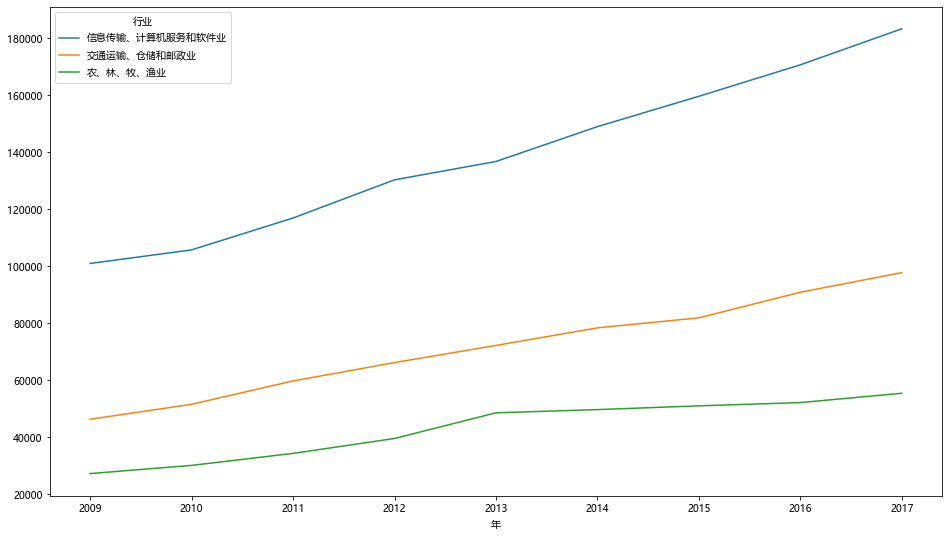

In [86]:
old.set_index(["地区","行业","年"]).unstack(-1).loc["北京市"].loc[["交通运输、仓储和邮政业","信息传输、计算机服务和软件业","农、林、牧、渔业"]].dropna(axis=1).sort_values(by=("数据",2017),ascending=False).droplevel(None,axis=1).T.plot(figsize=(16,9))

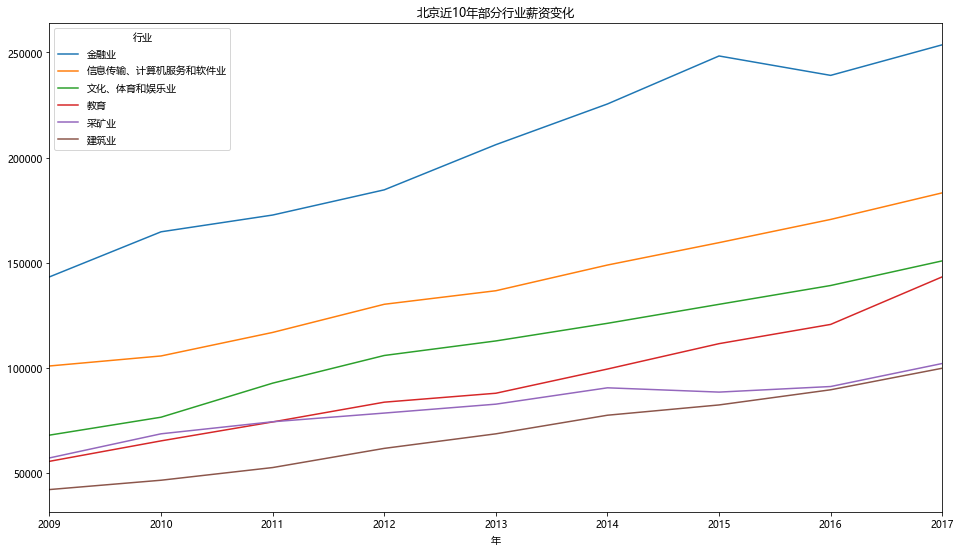

In [123]:
old.set_index(["地区","行业","年"]).unstack().loc["北京市"].loc[["金融业","信息传输、计算机服务和软件业","采矿业","建筑业","文化、体育和娱乐业","教育"]].dropna(axis=1).sort_values(by=("数据",2017),ascending=False).droplevel(None,axis=1).T.plot(figsize=(16,9),title='北京近10年部分行业薪资变化')

In [ ]:
#"信息传输、计算机服务和软件业","采矿业"